# VISUALIZING SIMULATION RESULTS
This lecture addresses the design of appropriate visualizations and how they can be done using python.

# Preliminaries

In [1]:
!pip install -q tellurium
import tellurium as te
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

     |████████████████████████████████| 121 kB 8.9 MB/s 
     |████████████████████████████████| 6.8 MB 51.7 MB/s 
     |████████████████████████████████| 3.3 MB 49.2 MB/s 
     |████████████████████████████████| 36.7 MB 1.2 MB/s 
     |████████████████████████████████| 2.1 MB 56.4 MB/s 
     |████████████████████████████████| 121 kB 64.9 MB/s 
     |████████████████████████████████| 121 kB 64.3 MB/s 
     |████████████████████████████████| 121 kB 70.2 MB/s 
     |████████████████████████████████| 4.3 MB 37.3 MB/s 
     |████████████████████████████████| 54.8 MB 127 kB/s 
     |████████████████████████████████| 2.6 MB 50.5 MB/s 
     |████████████████████████████████| 3.2 MB 53.5 MB/s 
     |████████████████████████████████| 5.6 MB 54.1 MB/s 
     |████████████████████████████████| 1.6 MB 60.1 MB/s 


# Glycolytic Oscillations

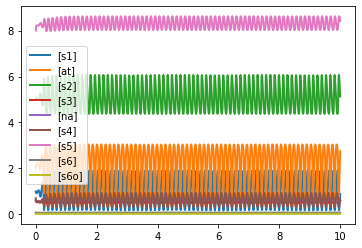

In [19]:
# Glycolytic oscillations - BioModels 206
url = "https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000206.2?filename=BIOMD0000000206_url.xml"
runner = te.loadSBMLModel(url)
data = runner.simulate(0, 10, 1000) # optional positional arguments: start_time, end_time, number of points
runner.plot()

# Plotting simulation results
* Selecting variables to plot
* Legend
* controlling x-range and y-range

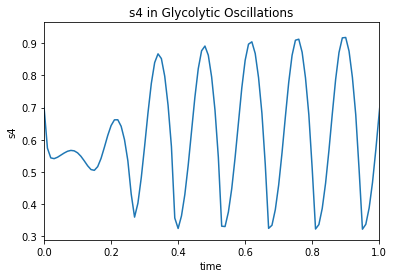

In [20]:
# Plot s4 over time
s4 = data["[s4]"]
times = data["time"]
times
plt.plot(times, s4)
plt.xlabel("time")
_ = plt.ylabel("s4")
_ = plt.xlim([0, 1])
_ = plt.title("s4 in Glycolytic Oscillations")

# Rules for visual design
1. Label axes and plots
1. Choose appropriate ranges for x and y axis
1. Choose appropriate plot type
  1. Line - y is a continuous function of x
  1. Scatter - y is not continuous in x
  1. Histogram - variable distributions

# Changing simulation parameters

In [22]:
print(runner.getAntimony())

// Created by libAntimony v2.13.2
model *Wolf2000_Glycolytic_Oscillations()

  // Compartments and Species:
  compartment compartment_;
  species s1 in compartment_, at_ in compartment_, s2 in compartment_, s3 in compartment_;
  species na in compartment_, s4 in compartment_, s5 in compartment_, s6 in compartment_;
  species s6o in compartment_;

  // Reactions:
  v1: s1 + 2 at_ -> s2; compartment_*k1*s1*at_/(1 + (at_/ki)^n);
  v2: s2 -> 2 s3; compartment_*k2*s2;
  v3: s3 + na -> s4 + at_; compartment_*((k31*k32*s3*na*(atot - at_) - k33*k34*s4*at_*(ntot - na))/(k33*(ntot - na) + k32*(atot - at_)));
  v4: s4 -> s5 + at_; compartment_*k4*s4*(atot - at_);
  v5: s5 -> s6; compartment_*k5*s5;
  v7: at_ -> ; compartment_*k7*at_;
  v8: s3 -> na; compartment_*k8*s3*(ntot - na);
  v9: s6o -> ; compartment_*k9*s6o;
  v10: s6 -> 0.1 s6o; compartment_*k10*(s6 - s6o);
  v6: s6 -> na; compartment_*k6*s6*(ntot - na);
  v0:  -> s1; compartment_*k0;

  // Species initializations:
  s1 = 1;
  at_ = 2;
 

In [27]:
k = "k1"
runner[k] = 10
runner[k]

10.0

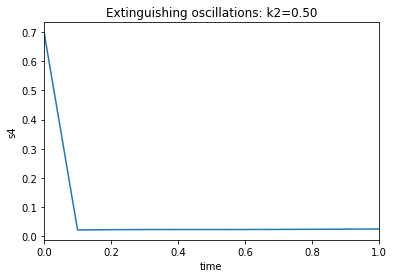

In [43]:
k = "k2"
runner = te.loadSBMLModel(url)
runner[k] = 0.5
data = runner.simulate()
s4 = data["[s4]"]
times = data["time"]
times
plt.plot(times, s4)
plt.xlabel("time")
_ = plt.ylabel("s4")
_ = plt.xlim([0, 1])
_ = plt.title("Extinguishing oscillations: %s=%2.2f" % (k, runner[k]))

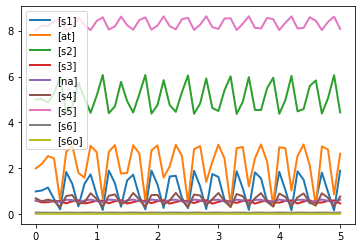

550.0

In [30]:
runner = te.loadSBMLModel(url)
data = runner.simulate()
runner.plot()
runner[k]

# Homework 1 overview